In [28]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Sklearn Tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance

In [29]:
# Load Data
df = pd.read_csv('student.csv')

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
y=df["math score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [32]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [33]:
# Print category levels
print("Categories in 'gender':", df['gender'].unique())
print("Categories in 'race/ethnicity':", df['race/ethnicity'].unique())
print("Categories in 'parental level of education':", df['parental level of education'].unique())
print("Categories in 'lunch':", df['lunch'].unique())
print("Categories in 'test preparation course':", df['test preparation course'].unique())

Categories in 'gender': ['female' 'male']
Categories in 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch': ['standard' 'free/reduced']
Categories in 'test preparation course': ['none' 'completed']


In [34]:
x=preprocessor.fit_transform(X)
x.shape

(1000, 14)

In [35]:
# Preprocessing
num_cols = X.select_dtypes(exclude="object").columns
cat_cols = X.select_dtypes(include="object").columns

In [36]:

# Column transformer
preprocessor = ColumnTransformer([
    ("OneHotEncoder", OneHotEncoder(drop='first'), cat_cols),
    ("StandardScaler", StandardScaler(), num_cols)
])

In [37]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [38]:
# Model Evaluation Function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, rmse, r2

In [39]:
# Models to Compare
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [40]:
model_list = []
r2_list = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(f"\n{name}")
    print("Training Performance:")
    print(f"  MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
    print("Test Performance:")
    print(f"  MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")
    
    model_list.append(name)
    r2_list.append(test_r2)


Linear Regression
Training Performance:
  MAE: 4.17, RMSE: 5.26, R²: 0.88
Test Performance:
  MAE: 4.57, RMSE: 5.62, R²: 0.85

Lasso Regression
Training Performance:
  MAE: 5.20, RMSE: 6.55, R²: 0.82
Test Performance:
  MAE: 5.10, RMSE: 6.60, R²: 0.80

Ridge Regression
Training Performance:
  MAE: 4.17, RMSE: 5.26, R²: 0.88
Test Performance:
  MAE: 4.57, RMSE: 5.62, R²: 0.85

KNN Regressor
Training Performance:
  MAE: 4.52, RMSE: 5.64, R²: 0.86
Test Performance:
  MAE: 5.83, RMSE: 7.33, R²: 0.75

Decision Tree
Training Performance:
  MAE: 0.01, RMSE: 0.12, R²: 1.00
Test Performance:
  MAE: 7.12, RMSE: 8.90, R²: 0.63

Random Forest
Training Performance:
  MAE: 1.78, RMSE: 2.26, R²: 0.98
Test Performance:
  MAE: 5.25, RMSE: 6.52, R²: 0.80


In [41]:
# Model Comparison Table
result_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'Test R²'])
print("\n" + "="*40 + "\n")
print("Model Comparison:\n", result_df.sort_values(by='Test R²', ascending=False))



Model Comparison:
                Model   Test R²
2   Ridge Regression  0.852435
0  Linear Regression  0.852377
5      Random Forest  0.801463
1   Lasso Regression  0.796694
3      KNN Regressor  0.749369
4      Decision Tree  0.630127


In [42]:
# Best model: Ridge Regression
best_model_name = "Ridge Regression"
best_model = Ridge()
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', best_model)
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  Index(['reading score', 'writing score'], dtype='object'))])),
                ('regressor', Ridge())])

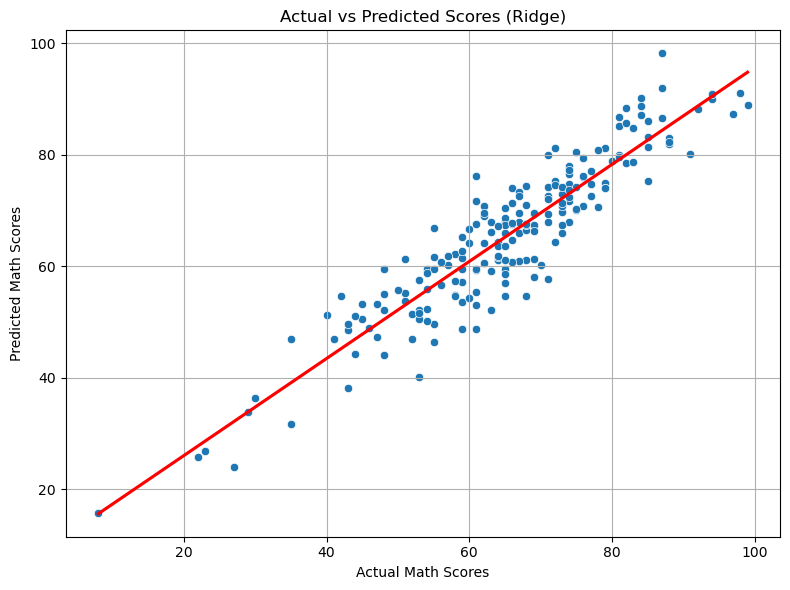

In [44]:
# Prediction Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', ci=None)
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted Scores (Ridge)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
# Feature Importance Plot (Permutation)
X_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
ridge_model = Ridge().fit(X_transformed, y_train)

perm_importance = permutation_importance(ridge_model, X_test_transformed, y_test, n_repeats=10, random_state=42, n_jobs=-1)

In [47]:
# Feature names
cat_feature_names = preprocessor.named_transformers_['OneHotEncoder'].get_feature_names_out(cat_cols)
feature_names = np.concatenate([cat_feature_names, num_cols])
top_idx = perm_importance.importances_mean.argsort()[::-1][:10]

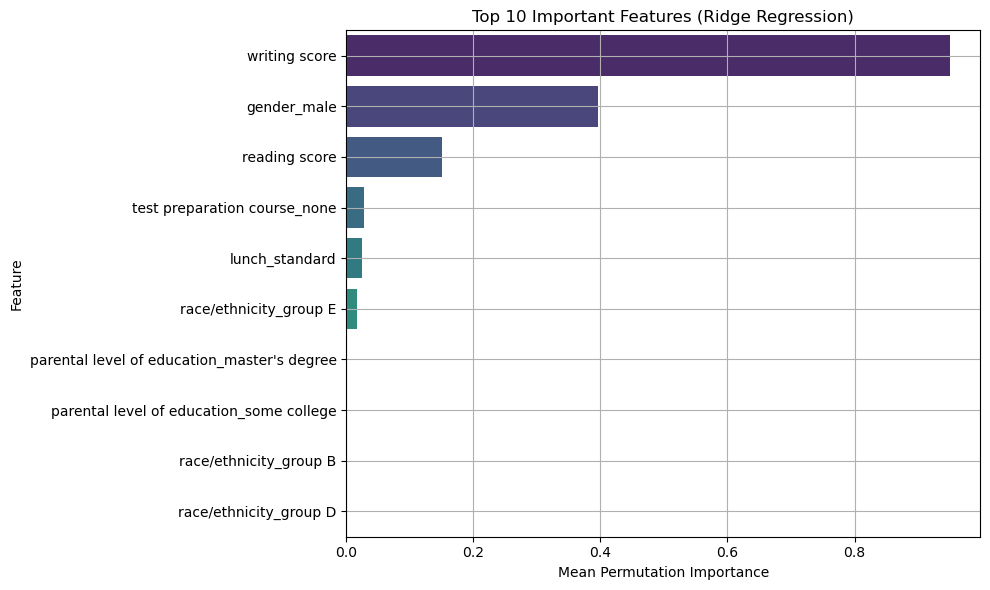

In [48]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=perm_importance.importances_mean[top_idx], y=feature_names[top_idx], palette='viridis')
plt.title("Top 10 Important Features (Ridge Regression)")
plt.xlabel("Mean Permutation Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.grid(True)
plt.show()

In [52]:
# Final prediction
y_pred = pipeline.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("\nBest Model: Ridge Regression")
print("R² Score on Test Data: %.2f%%" % score)


Best Model: Ridge Regression
R² Score on Test Data: 85.24%


In [51]:

# ✅ Final Report Table
y_final_pred = pipeline.predict(X_test)

final_report = pd.DataFrame({
    "Actual Score": y_test,
    "Predicted Score": y_final_pred,
    "Error": y_test - y_final_pred
})

print("\nFinal Report:\n", final_report.head())
print("🎓 Analysis complete. Thank you!")



Final Report:
      Actual Score  Predicted Score     Error
519            67        66.016531  0.983469
837            75        70.049741  4.950259
208            74        68.022502  5.977498
525            68        71.000702 -3.000702
978            55        49.555090  5.444910
🎓 Analysis complete. Thank you!
